IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
import re
import string
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Conv1D, BatchNormalization, Activation, Add, Flatten

In [3]:
# Load the dataset
#dataset_path = "../../../../senne/OneDrive/Bureaublad/datasets/IMDBDataset.csv"
dataset_path = "../datasets/IMDBDataset.csv"

df = pd.read_csv(dataset_path)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Data voorbewerking

In [15]:
# Functie voor het uitvoeren van de voorbewerkingsstappen
# Text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    return text

# Pas de voorbewerking toe op de 'review'-kolom
df['review'] = df['review'].apply(preprocess_text)

# Map sentiment strings to numerical values
sentiment_mapping = {'positive': 1, 'negative': 0}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

# Bekijk de voorbewerkte dataset
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


De verdeling van de collumn sentiment bekijken (een piechart plot)

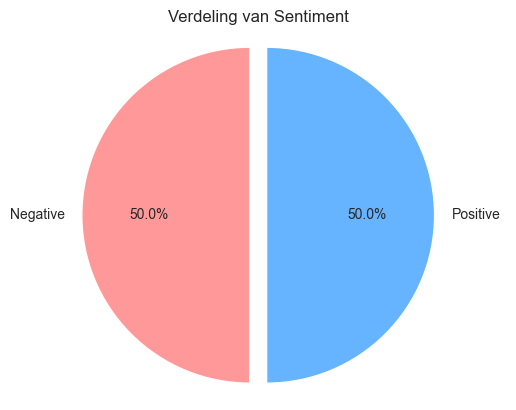

In [17]:
# Bereken de verdeling van de klassen
class_distribution = df['sentiment'].value_counts()

# Maak een pie chart
labels = ['Negative', 'Positive']
sizes = class_distribution.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Maak een uitspatting voor het benadrukken van de 'Negative'-sectie

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Zorgt ervoor dat de pie chart een cirkel is in plaats van een ellips
plt.title('Verdeling van Sentiment')
plt.show()

50/50 goed verdeeld.

## Tokenizer

In [16]:
# Preprocess the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=100)

## Splitten van de data

In [18]:
# Split the data into training and testing sets
train_size = int(0.8 * len(padded_sequences))
train_data = padded_sequences[:train_size]
train_labels = df['sentiment'][:train_size]
test_data = padded_sequences[train_size:]
test_labels = df['sentiment'][train_size:]

## RNN model
LSTM-laag

In [3]:
# Build the RNN model
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5


2023-05-20 11:52:21.350573: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 36s 57ms/step - loss: 0.3943 - accuracy: 0.8172 - val_loss: 0.3663 - val_accuracy: 0.8444
Epoch 2/5
625/625 [==============================] - 31s 50ms/step - loss: 0.2931 - accuracy: 0.8783 - val_loss: 0.3303 - val_accuracy: 0.8580
Epoch 3/5
625/625 [==============================] - 31s 49ms/step - loss: 0.2621 - accuracy: 0.8931 - val_loss: 0.3551 - val_accuracy: 0.8584
Epoch 4/5
625/625 [==============================] - 31s 50ms/step - loss: 0.2301 - accuracy: 0.9087 - val_loss: 0.3944 - val_accuracy: 0.8537
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.4239 - accuracy: 0.8453
Test Loss: 0.4238584041595459
Test Accuracy: 0.845300018787384


Epoch 1/5
625/625 [==============================] - 33s 53ms/step - loss: 0.1848 - accuracy: 0.9272 - val_loss: 0.3742 - val_accuracy: 0.8514
Epoch 2/5
625/625 [==============================] - 34s 54ms/step - loss: 0.1643 - accuracy: 0.9372 - val_loss: 0.4057 - val_accuracy: 0.8462
Epoch 3/5
625/625 [==============================] - 32s 51ms/step - loss: 0.1435 - accuracy: 0.9449 - val_loss: 0.4669 - val_accuracy: 0.8470
Epoch 4/5
625/625 [==============================] - 32s 51ms/step - loss: 0.1266 - accuracy: 0.9531 - val_loss: 0.4925 - val_accuracy: 0.8453
Epoch 5/5
625/625 [==============================] - 32s 52ms/step - loss: 0.1018 - accuracy: 0.9643 - val_loss: 0.5512 - val_accuracy: 0.8476


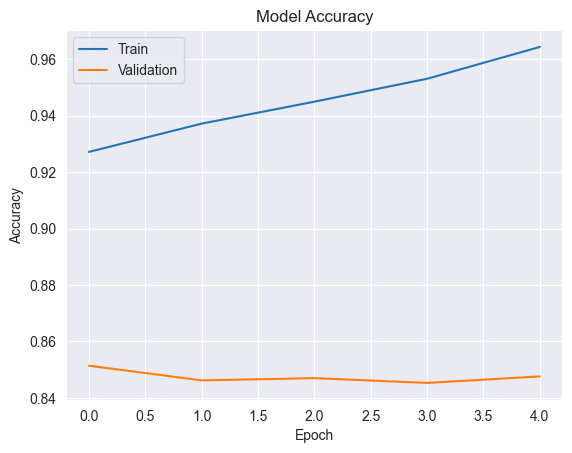

In [4]:
# Train the model and save the history
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=64)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


er komt overfitting voor. Want de training lijn zit duidelijk constant boven de val lijn.

## Model aanpassen
#### Om het overfitten te verminderen voegen we toe:
- L2 regularizaton with a coefficent 0.01
- Dropout layer met een rate van 0.2

In [5]:
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(LSTM(100, kernel_regularizer=regularizers.l2(0.01)))  # Apply L2 regularization with a coefficient of 0.01
model.add(Dropout(0.2))  # Add a Dropout layer with a dropout rate of 0.2
model.add(Dense(1, activation='sigmoid'))

Epoch 1/10
625/625 [==============================] - 32s 50ms/step - loss: 0.2410 - accuracy: 0.9096 - val_loss: 0.4008 - val_accuracy: 0.8527
Epoch 2/10
625/625 [==============================] - 31s 50ms/step - loss: 0.2318 - accuracy: 0.9134 - val_loss: 0.3560 - val_accuracy: 0.8517
Epoch 3/10
625/625 [==============================] - 32s 51ms/step - loss: 0.2218 - accuracy: 0.9200 - val_loss: 0.3765 - val_accuracy: 0.8515
Epoch 4/10
625/625 [==============================] - 31s 50ms/step - loss: 0.2119 - accuracy: 0.9232 - val_loss: 0.3796 - val_accuracy: 0.8501


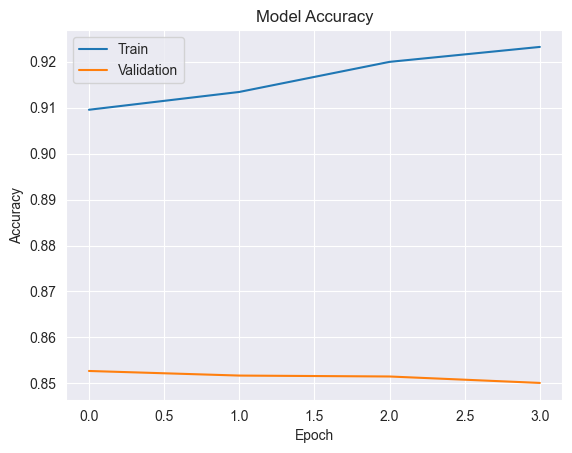

313/313 [==============================] - 3s 10ms/step - loss: 0.3796 - accuracy: 0.8501
Test Loss: 0.3795550465583801
Test Accuracy: 0.8500999808311462


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=2)  # Stop training if the validation loss does not improve for 2 epochs
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=64, callbacks=[early_stopping])

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Als we kijken naar de y-as hebben we zeker vooruitgang geboekt met het verminderen van overfitting. De lijn eindigt nu boven de 0.92 en voor de wijzigen was dat boven de 0.96. De validation score is wel hetzelfde gebleven.

## ResNet

In [29]:
# Define the ResNet model
inputs = Input(shape=(100,))
x = Embedding(5000, 64, input_length=100)(inputs)

# Residual blocks
num_blocks = 3
filters = 64
for _ in range(num_blocks):
    y = Conv1D(filters, kernel_size=3, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv1D(filters, kernel_size=3, padding='same')(y)
    y = BatchNormalization()(y)
    y = Add()([x, y])
    x = Activation('relu')(y)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
625/625 [==============================] - 23s 36ms/step - loss: 0.7287 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 2/5
625/625 [==============================] - 23s 37ms/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6932 - val_accuracy: 0.4993
Epoch 3/5
625/625 [==============================] - 24s 39ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 4/5
625/625 [==============================] - 24s 38ms/step - loss: 0.6933 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.4993
Test Loss: 0.6931666731834412
Test Accuracy: 0.4993000030517578


Oke de resnet is duidelijk een stuk beter met beeldclassificatie.